# Exploring Stackoverflow Anual Survey 2019

This is the first project for Udacity's Data Scientist Nanodegree. The data used in this project was obtained from [Stack Overflow Annual Developer Survey](https://insights.stackoverflow.com/survey)  The whole project is implemented following "Cross-Industry Standard Process for Data Mining (CRISP-DM)" process, an industry standard for data analysis. It includes 6 steps: 

1. Business Understanding.
2. Data Understanding.
3. Prepare Data.
4. Data Modeling.
5. Evaluate the Results
6. Deploy.

In this project, we will follow the above steps to explore the data. 

## 1. Business Understanding
Being a female in technology myself, I am mostly interested in what female scientists feels working/studyin in this field. Therefore I would like to find answers to the following questions:

1. What are the distributions of females with respect to ethnicity, level of education, coutry, etc?
2. What are the challenges that females are facing in tech field? 
3. What does the data suggest of males and females in terms of age, working hours , career satisfaction and salary?  Are there any differences? 

With these questions in mind, let's get into the field and take a loot at the data.

## 2. Data Understanding
First of all, let's take a look at the big piture. 

In [20]:
# Import libraries we need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# load the data and take a look at the first several rows
sof = pd.read_csv("data/survey_results_public.csv")
sof.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [21]:
# Take a look at how many rows and columns this dataset has
sof.shape

(88883, 85)

In [4]:
# Take a look at the statistics of numerical data
sof.describe()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,88883.000000,5.594500e+04,5.582300e+04,64503.000000,49790.000000,79210.000000
mean,44442.000000,5.519014e+11,1.271107e+05,42.127197,5.084308,30.336699
std,25658.456325,7.331926e+13,2.841523e+05,37.287610,5.513931,9.178390
min,1.000000,0.000000e+00,0.000000e+00,1.000000,0.000000,1.000000
25%,22221.500000,2.000000e+04,2.577750e+04,40.000000,2.000000,24.000000
50%,44442.000000,6.200000e+04,5.728700e+04,40.000000,4.000000,29.000000
75%,66662.500000,1.200000e+05,1.000000e+05,44.750000,6.000000,35.000000
max,88883.000000,1.000000e+16,2.000000e+06,4850.000000,99.000000,99.000000


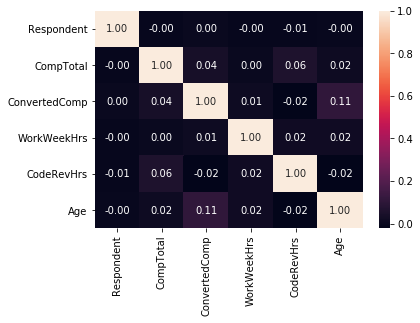

In [14]:
# Let's create a correlation matrix to see if there are any correlation among these numerical data
sns.heatmap(sof.corr(), annot=True, fmt=".2f");

Unfortunately, the heatmap shows that none of the variables appear to greatly correlated with each other.

In [16]:
sof.columns

Index([u'Respondent', u'MainBranch', u'Hobbyist', u'OpenSourcer',
       u'OpenSource', u'Employment', u'Country', u'Student', u'EdLevel',
       u'UndergradMajor', u'EduOther', u'OrgSize', u'DevType', u'YearsCode',
       u'Age1stCode', u'YearsCodePro', u'CareerSat', u'JobSat', u'MgrIdiot',
       u'MgrMoney', u'MgrWant', u'JobSeek', u'LastHireDate', u'LastInt',
       u'FizzBuzz', u'JobFactors', u'ResumeUpdate', u'CurrencySymbol',
       u'CurrencyDesc', u'CompTotal', u'CompFreq', u'ConvertedComp',
       u'WorkWeekHrs', u'WorkPlan', u'WorkChallenge', u'WorkRemote',
       u'WorkLoc', u'ImpSyn', u'CodeRev', u'CodeRevHrs', u'UnitTests',
       u'PurchaseHow', u'PurchaseWhat', u'LanguageWorkedWith',
       u'LanguageDesireNextYear', u'DatabaseWorkedWith',
       u'DatabaseDesireNextYear', u'PlatformWorkedWith',
       u'PlatformDesireNextYear', u'WebFrameWorkedWith',
       u'WebFrameDesireNextYear', u'MiscTechWorkedWith',
       u'MiscTechDesireNextYear', u'DevEnviron', u'OpSys', u'Co

In [6]:
sof.dtypes

Respondent          int64
MainBranch         object
Hobbyist           object
OpenSourcer        object
OpenSource         object
Employment         object
Country            object
Student            object
EdLevel            object
UndergradMajor     object
EduOther           object
OrgSize            object
DevType            object
YearsCode          object
Age1stCode         object
YearsCodePro       object
CareerSat          object
JobSat             object
MgrIdiot           object
MgrMoney           object
MgrWant            object
JobSeek            object
LastHireDate       object
LastInt            object
FizzBuzz           object
JobFactors         object
ResumeUpdate       object
CurrencySymbol     object
CurrencyDesc       object
CompTotal         float64
                   ...   
Containers         object
BlockchainOrg      object
BlockchainIs       object
BetterLife         object
ITperson           object
OffOn              object
SocialMedia        object
Extraversion

In [7]:
# select compensation(salary) related field, we find that some 
sof[['CurrencySymbol', 'CurrencyDesc', 'CompTotal', 'CompFreq', 'ConvertedComp']].dropna(axis=0,how='all')

,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp
2,THB,Thai baht,23000.0,Monthly,8820.0
3,USD,United States dollar,61000.0,Yearly,61000.0
4,UAH,Ukrainian hryvnia,NaN,NaN,NaN
5,CAD,Canadian dollar,40000.0,Monthly,366420.0
6,USD,United States dollar,NaN,NaN,NaN
8,NZD,New Zealand dollar,138000.0,Yearly,95179.0
9,INR,Indian rupee,950000.0,Yearly,13293.0
12,USD,United States dollar,90000.0,Yearly,90000.0
13,EUR,European Euro,4150.0,Monthly,57060.0
15,GBP,Pound sterling,29000.0,Monthly,455352.0


In [8]:
num_df = sof.select_dtypes(include=['float64']).copy()
num_df.head()

,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
0,NaN,NaN,NaN,NaN,14.0
1,NaN,NaN,NaN,NaN,19.0
2,23000.0,8820.0,40.0,NaN,28.0
3,61000.0,61000.0,80.0,NaN,22.0
4,NaN,NaN,55.0,NaN,30.0


In [9]:
women = sof[sof["Gender"]== "Woman"]
women 

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
11,12,I am a student who is learning to code,No,Never,"OSS is, on average, of HIGHER quality than pro...",Employed part-time,Canada,"Yes, full-time",Some college/university study without earning ...,Mathematics or statistics,...,Just as welcome now as I felt last year,Courses on technologies you're interested in,21.0,Woman,No,Straight / Heterosexual,Black or of African descent,No,Appropriate in length,Easy
30,31,I am a student who is learning to code,No,Never,NaN,"Not employed, and not looking for work",Canada,No,Primary/elementary school,NaN,...,NaN,NaN,NaN,Woman,No,NaN,East Asian,No,Too long,Neither easy nor difficult
34,35,I am a developer by profession,No,Never,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Information systems, information technology, o...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,35.0,Woman,No,Straight / Heterosexual,Black or of African descent,No,Appropriate in length,Easy
50,51,I am a student who is learning to code,Yes,Never,"OSS is, on average, of HIGHER quality than pro...",Employed part-time,United States,"Yes, full-time",Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers,18.0,Woman,No,Straight / Heterosexual,South Asian,No,Too long,Easy
70,71,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Philippines,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,A lot more welcome now than last year,Tech articles written by other developers;Tech...,21.0,Woman,No,Straight / Heterosexual,East Asian;South Asian,No,Appropriate in length,Easy
74,75,I am a developer by profession,Yes,Never,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,India,"Yes, full-time","Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Courses on technologies you're interested in,27.0,Woman,No,Straight / Heterosexual,NaN,No,Too long,Neither easy nor difficult
85,86,"I am not primarily a developer, but I write co...",Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,China,No,Some college/university study without earning ...,"Information systems, information technology, o...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Indu...,26.0,Woman,No,Straight / Heterosexual,NaN,Yes,Too long,Neither easy nor difficult
99,100,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,Canada,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,39.0,Woman,No,Bisexual,White or of European descent,No,Appropriate in length,Easy
104,105,I am a developer by profession,Yes,Less than once per year,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,NaN,Woman,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
140,142,I am a developer by profession,No,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,

In [10]:
women['CompFreq']

11           NaN
30           NaN
34        Yearly
50           NaN
70       Monthly
74        Yearly
85       Monthly
99        Yearly
104       Yearly
140       Yearly
146       Yearly
148          NaN
161      Monthly
165      Monthly
178          NaN
179      Monthly
184          NaN
185          NaN
221      Monthly
225          NaN
231       Yearly
234          NaN
270          NaN
293          NaN
306       Yearly
314       Yearly
319       Yearly
325          NaN
341          NaN
348          NaN
          ...   
88638        NaN
88648        NaN
88658        NaN
88662        NaN
88668        NaN
88669        NaN
88682        NaN
88683        NaN
88686        NaN
88692        NaN
88693        NaN
88695        NaN
88700        NaN
88704        NaN
88708        NaN
88712        NaN
88759        NaN
88769        NaN
88773        NaN
88810        NaN
88817        NaN
88821        NaN
88833        NaN
88835        NaN
88837        NaN
88838        NaN
88844        NaN
88846        N

In [11]:
women['Employment'].value_counts()

Employed full-time                                      4601
Not employed, but looking for work                       516
Employed part-time                                       419
Independent contractor, freelancer, or self-employed     416
Not employed, and not looking for work                   258
Retired                                                   22
Name: Employment, dtype: int64

In [12]:
women_salary = women.select_dtypes(include=['float64']).copy()
women_salary

,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
11,NaN,NaN,NaN,NaN,21.0
30,NaN,NaN,NaN,NaN,NaN
34,80000.0,80000.0,40.0,0.5,35.0
50,NaN,NaN,NaN,NaN,18.0
70,18000.0,4128.0,8.0,NaN,21.0
74,1250000.0,17491.0,50.0,1.0,27.0
85,9000.0,16008.0,50.0,10.0,26.0
99,300000.0,229016.0,35.0,5.0,39.0
104,45000.0,45000.0,40.0,4.0,NaN
140,180000.0,180000.0,40.0,8.0,24.0


In [13]:
women_salary['Age'].value_counts()

25.0    411
26.0    394
24.0    380
23.0    375
28.0    374
27.0    362
30.0    302
29.0    298
22.0    267
31.0    234
32.0    216
21.0    190
33.0    161
20.0    155
34.0    142
36.0    137
35.0    118
37.0    104
38.0     94
40.0     80
19.0     78
39.0     70
41.0     65
42.0     63
18.0     59
43.0     38
45.0     35
17.0     34
48.0     34
46.0     32
       ... 
54.0     12
15.0     11
56.0     11
14.0     11
57.0      9
58.0      8
13.0      7
62.0      6
61.0      6
59.0      6
65.0      4
60.0      3
72.0      3
67.0      3
64.0      3
99.0      2
63.0      2
71.0      2
1.0       2
66.0      1
31.5      1
85.0      1
23.9      1
12.0      1
14.5      1
76.0      1
77.0      1
11.0      1
80.0      1
69.0      1
Name: Age, Length: 69, dtype: int64

In [26]:
men = sof[sof["Gender"]== "Man"].head()
men


,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [29]:
men_salary = men.select_dtypes(include=['float64']).copy()
men_salary.describe()

,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,2.000000,2.000000,3.000000,0.0,5.000000
mean,42000.000000,34910.000000,58.333333,NaN,22.600000
std,26870.057685,36896.831842,20.207259,NaN,6.542171
min,23000.000000,8820.000000,40.000000,NaN,14.000000
25%,32500.000000,21865.000000,47.500000,NaN,19.000000
50%,42000.000000,34910.000000,55.000000,NaN,22.000000
75%,51500.000000,47955.000000,67.500000,NaN,28.000000
max,61000.000000,61000.000000,80.000000,NaN,30.000000


# 3. Prepare Data

# 4. Model Data

# 5. Results

# 6. Deploy